In [2]:
import librosa.display
import librosa
import numpy as np

import matplotlib.pyplot as plt

In [10]:
feature = "pitch_chroma"

# define path to file
file_name = "schubert"

# define path to file
# Nima stim
path = "./music/"

audio_fpath = path + file_name + '.wav'
print(audio_fpath)

# load audio file
sr = 44100
y, sr = librosa.load(audio_fpath, sr = sr)

./music/schubert.wav


In [11]:
# Remove silence from file
# Schubert: 0
# Furelise: 3s
# PrestoAgitato: 6s
# Symph5: 0 
# Cancan: 0
# Brahms: 0

if file_name == "furelise":
    y = y[44100*3:,]
elif file_name == "prestoagitato":
    y = y[44100*6:len(y)-44100*3,]
elif file_name == "schubert":
    y = y[:len(y)-44100*2,]
        

print(y.shape)

(10347624,)


In [12]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=12, n_fft=4096)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)


<Figure size 432x288 with 0 Axes>

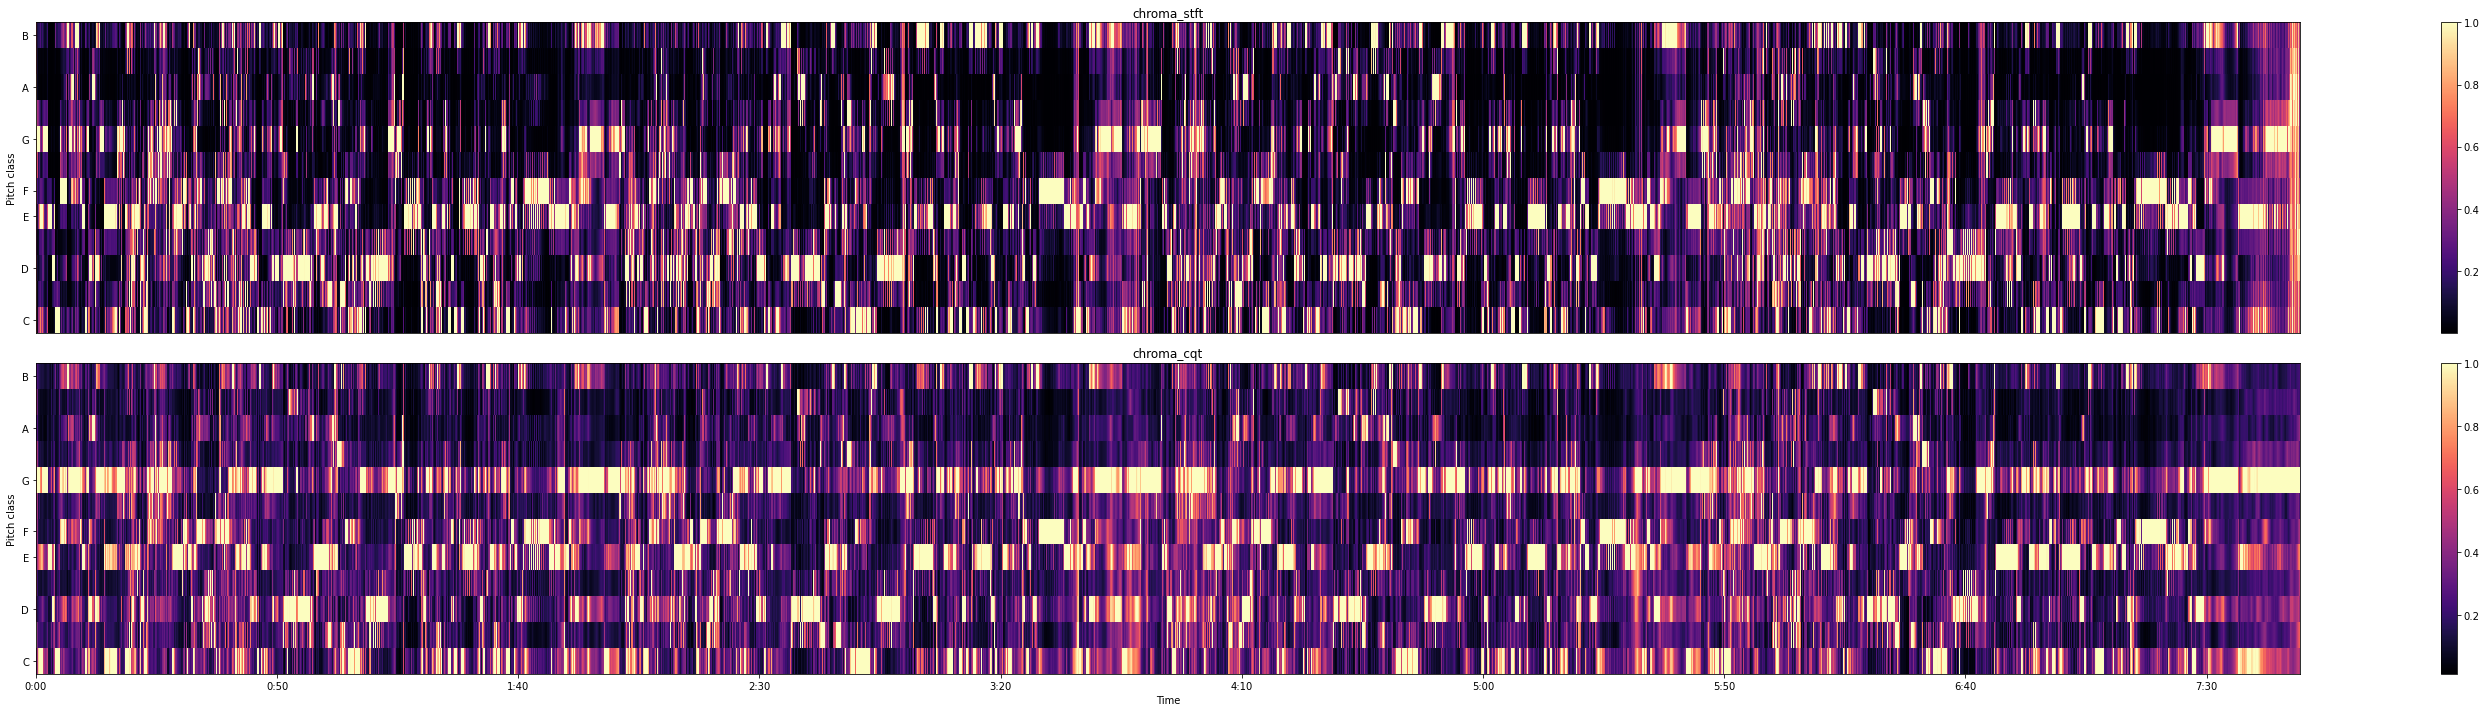

In [13]:
plt.figure()
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
plt.subplot(2,1,1)
librosa.display.specshow(chroma_stft, y_axis='chroma')
plt.title('chroma_stft')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(chroma_cq[:,], y_axis='chroma', x_axis='time')
plt.title('chroma_cqt')
plt.colorbar()
plt.tight_layout()


Text(0, 0.5, 'pitch class')

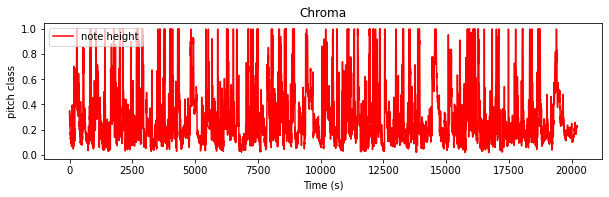

In [14]:
note_height = chroma_cq[11,]

plt.figure(figsize=(10,2.5))

plt.plot(np.arange(len(note_height)), note_height, color='r', linewidth=1.5, label='note height')
plt.title('Chroma')
plt.legend(frameon=True, framealpha=0.75)

plt.xlabel('Time (s)')
plt.ylabel('pitch class')


In [106]:
# Save in Matlab format:

mat_path = '/Users/clairepelofi/Dropbox/Project Musical Tension/Musical-feature-extraction/Matlab features/'
mat_name = mat_path + file_name + '_' + feature

import scipy.io
scipy.io.savemat(mat_name + '.mat', dict(chroma = chroma_cq))